In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

In [28]:
def random_points_in_circle(center, radius, num_points):
    sampler = qmc.Sobol(d=2, scramble=True)
    points = sampler.random(n=num_points)
    r = np.sqrt(points[:, 0]) * radius
    theta = 2 * np.pi * points[:, 1]

    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)

    return np.column_stack((x, y))


def random_points_in_square(center, side, num_points):
    x = np.random.uniform(center[0] - side / 2, center[0] + side / 2, num_points)
    y = np.random.uniform(center[1] - side / 2, center[1] + side / 2, num_points)
    return np.column_stack((x, y))

In [29]:
prey = np.array([0,0])

point = np.array([1, 1])
print(f"{point = }, {prey = }")

r = 0.1  
# if: r>.5, then: A>0, elif: r<.5, then: A<0
print(f"{r = }")

# a controls the size of A, r controls the sign and size of A
a = 1  
A = 2 * a * (r - 0.5)
C = 2 * r
print(f"{A = }, {np.abs(A) = :.2f}, {C = }")

D = np.abs(C * prey - point)
print(f"{D = }, {(C * prey - point) = }")

new_point = prey - A * D
print(f"{new_point = }, {A * D = }")

point = array([1, 1]), prey = array([0, 0])
r = 0.1
A = -0.8, np.abs(A) = 0.80, C = 0.2
D = array([1., 1.]), (C * prey - point) = array([-1., -1.])
new_point = array([0.8, 0.8]), A * D = array([-0.8, -0.8])


In [30]:
point = np.array([1, 1])
print(f"{point = }, {prey = }")

r = np.array([0.4, 0.6]) 
# for each dimension d: if: r_d>.5, then: A_d>0, elif: r_d<.5, then: A_d<0
print(f"{r = }")

# a controls the scaling of A, r controls the signs and scaling of A dimensions
a = 1  
A = 2 * a * (r - 0.5)
C = 2 * r
print(f"{A = }, {np.abs(A) = }, {C = }")

D = np.abs(C * prey - point)
print(f"{D = }, {(C * prey - point) = }")

new_point = prey - A * D
print(f"{new_point = }, {A * D = }")

point = array([1, 1]), prey = array([0, 0])
r = array([0.4, 0.6])
A = array([-0.2,  0.2]), np.abs(A) = array([0.2, 0.2]), C = array([0.8, 1.2])
D = array([1., 1.]), (C * prey - point) = array([-1., -1.])
new_point = array([ 0.2, -0.2]), A * D = array([-0.2,  0.2])


In [ ]:
num_points = 1000

prey = np.array([0.5, 0.5])
origin = np.array([0, 0])

np.random.seed(7)

# random_points = random_points_in_square(origin, 2, num_points)  # square
random_points = random_points_in_circle(origin, 1, num_points)  # circle
new_points_old = random_points.copy()

for i in range(num_points):
    a = .6
    r = np.random.random() 
    A = (2 * a * r) - a
    C = 2 * r
    l = (np.random.random() * 2) - 1
    p = np.random.random()
    b = 1
    D = np.abs(C * prey - random_points[i])
    new_points_old[i] = prey - A * D


new_points_new = random_points.copy()

for i in range(num_points):
    a = .6
    r = np.random.random(2) 
    A = (2 * a * r) - a
    C = 2 * r
    l = (np.random.random() * 2) - 1
    p = np.random.random()
    b = 1
    D = np.abs(C * prey - random_points[i])
    new_points_new[i] = prey - A * D

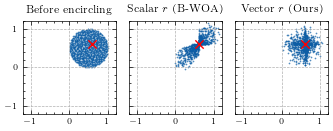

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Apply scientific plotting style
plt.style.use(["science"])

# Update font and layout settings for IEEE compatibility
plt.rcParams.update(
    {
        "font.size": 9,  # General font size
        "axes.titlesize": 7.5,  # Axis title font size
        "axes.labelsize": 8,  # X and Y axis labels
        "xtick.labelsize": 6,  # X-axis tick labels
        "ytick.labelsize": 6,  # Y-axis tick labels
        "legend.fontsize": 6,  # Legend font size
        "axes.linewidth": 0.5,  # Axis line thickness
        "grid.linewidth": 0.5,  # Grid line thickness
    }
)

# Create the figure
fig, axes = plt.subplots(1, 3, figsize=(3.5, 2), sharex=True, sharey=True)
fig.subplots_adjust(hspace=4)

# Define titles for each subplot
titles = [
    "Before encircling",
    "Scalar $r$ (B-WOA)",
    "Vector $r$ (Ours)"
]

# Plot each case
for ax, data, title in zip(axes, [random_points, new_points_old, new_points_new], titles):
    ax.set_aspect('equal', adjustable='box')
    ax.scatter(data[:, 0], data[:, 1], marker="o", s=1.5, alpha=0.7, linewidths=0, label="agents")
    ax.scatter(prey[0], prey[1], c="r", marker="x", linewidths=1, label="prey")
    ax.set_title(title)#, fontsize=7)
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.grid(True, linestyle="--", linewidth=0.5)
    # if "Scalar" in title: ax.legend()
    # if "Vector" in title:
    #     ax.yaxis.tick_right()  
    #     ax.yaxis.set_label_position("right")  # Move y-axis label to the right
    #     ax.set_yticklabels(ax.get_yticks())
        

# Adjust layout and save the figure
fig.tight_layout()
# plt.savefig("exploration-exploitation-comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()


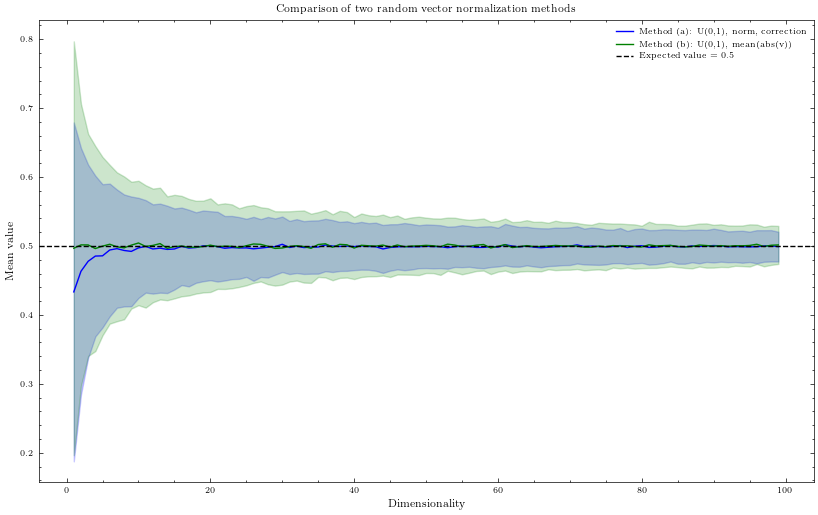

In [36]:
import numpy as np
import matplotlib.pyplot as plt

ns = np.arange(1, 100)
points = 1000
ms_a, ss_a = [], []  # Method (a) - norm, correction
ms_b, ss_b = [], []  # Method (b) - mean absolute value

for n in ns:
    
    # Method (a)
    v_a = np.random.uniform(0, 1, (points, n))
    correction_factor = 0.5 / np.sqrt(n / 3)
    norm_a = np.linalg.norm(v_a, axis=-1) * correction_factor
    ms_a.append(norm_a.mean())
    ss_a.append(norm_a.std())

    # Method (b)
    v_b = np.random.uniform(0, 1, (points, n))
    mean_b = np.abs(v_b).mean(axis=-1)
    ms_b.append(mean_b.mean())
    ss_b.append(mean_b.std())

ms_a, ss_a = np.array(ms_a), np.array(ss_a)
ms_b, ss_b = np.array(ms_b), np.array(ss_b)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(ns, ms_a, label="Method (a): U(0,1), norm, correction", color='blue')
plt.fill_between(ns, ms_a - ss_a, ms_a + ss_a, alpha=0.2, color='blue')

plt.plot(ns, ms_b, label="Method (b): U(0,1), mean(abs(v))", color='green')
plt.fill_between(ns, ms_b - ss_b, ms_b + ss_b, alpha=0.2, color='green')

plt.axhline(0.5, color='black', linestyle='dashed', label="Expected value = 0.5")
plt.xlabel("Dimensionality")
plt.ylabel("Mean value")
plt.legend()
plt.title("Comparison of two random vector normalization methods")
plt.show()
